In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/south-african-powerball-results-lottery/POWERBALL.csv


In [2]:
#Packages 
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib as plt
import plotly.express as px



In [3]:
lott_path='/kaggle/input/south-african-powerball-results-lottery/POWERBALL.csv'
lotto_data=pd.read_csv(lott_path)
#lotto_data.rename(index=)


In [10]:
#help(sklearn)
#dir(pd.DataFrame.hist)

Unique list:['PB5' 'PB4' 'PB2' 'PB8' 'PB7' 'PB10' 'PB6' 'PB9' 'PB3' 'PB1']
------------------------------------------------------------------------------------
count    577.000000
mean      10.637782
std        5.788413
min        1.000000
25%        6.000000
50%       11.000000
75%       16.000000
max       20.000000
Name: Powerball, dtype: float64
------------------------------------------------------------------------------------


{'PB5': 8,
 'PB4': 6,
 'PB2': 15,
 'PB8': 16,
 'PB7': 3,
 'PB10': 4,
 'PB6': 13,
 'PB9': 16,
 'PB3': 20,
 'PB1': 18}

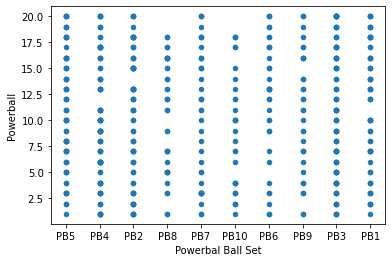

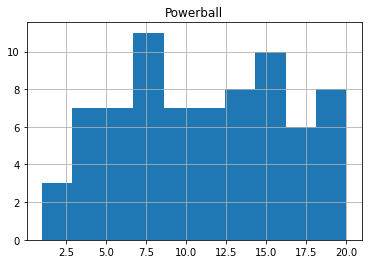

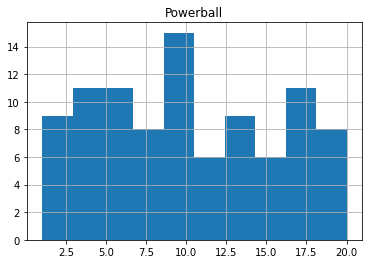

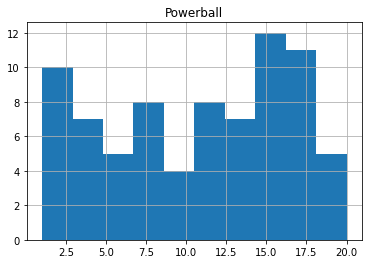

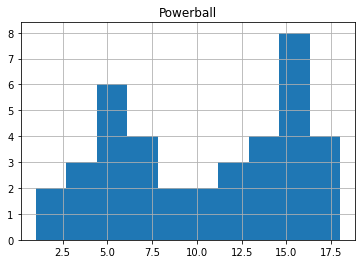

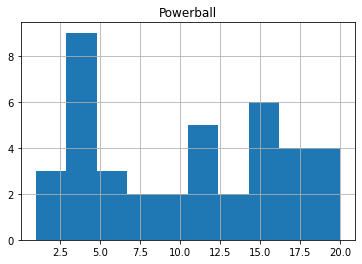

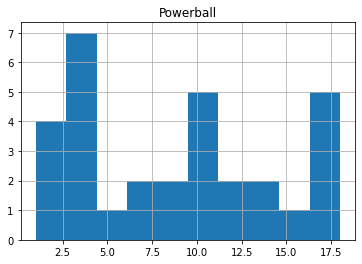

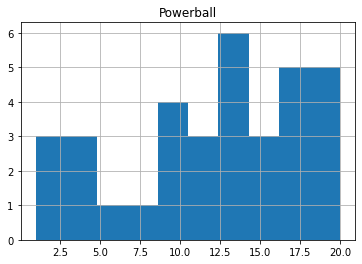

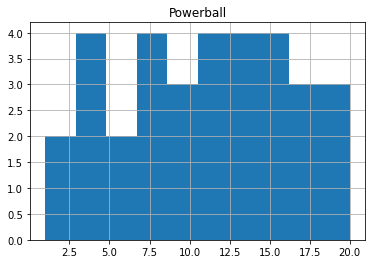

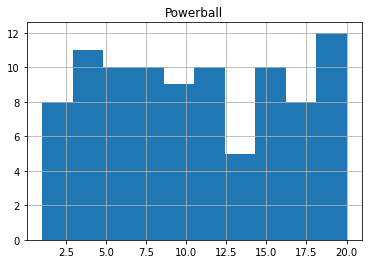

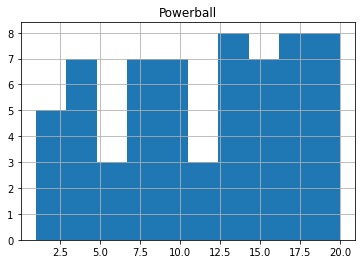

In [11]:
lotto_data.head(2)
figx=lotto_data[['Powerball','Powerbal Ball Set']].plot(x='Powerbal Ball Set',y='Powerball',kind='scatter')
uqlist=lotto_data['Powerbal Ball Set'].unique()
mena=lotto_data['Powerball'].describe()
modes={}
for i in uqlist:
    lotto_data[lotto_data['Powerbal Ball Set']==i][['Powerbal Ball Set','Powerball']].hist()
    rmode=pd.DataFrame(lotto_data[lotto_data['Powerbal Ball Set']==i]['Powerball']).mode(axis=0)
    modes.update({i:rmode["Powerball"][0]})
print(f"Unique list:{uqlist}\n{'---'*28}\n{mena}\n{'---'*28}")
modes


In [ ]:
help()

In [13]:
lotto_data.columns

Index(['Draw No', 'Draw Date', 'Ball 1', 'Ball 2', 'Ball 3', 'Ball 4',
       'Ball 5', 'Powerball', 'Div1', 'Div2', 'Div3', 'Div4', 'Div5', 'Div6',
       'Div7', 'Div8', 'Div1 No Win', 'Div2 No Win', 'Div3 No Win',
       'Div4 No Win', 'Div5 No Win', 'Div6 No Win', 'Div7 No Win',
       'Div8 No Win', 'Prize Payable', 'Rollover', 'Rollover Count',
       'Next Estimated Jackpot', 'Next Guaranteed Jackpot', 'Total Sales',
       'Draw Machine', 'Ball Set', 'Powerball Draw Machine',
       'Powerbal Ball Set', 'Gauteng Winners', 'Western Cape Winners',
       'Northern Cape Winners', 'Eastern Cape Winners', 'Mpumalanga Winners',
       'Limpopo Winners', 'Freestate Winners', 'KZN Winners',
       'North West Winners'],
      dtype='object')

In [65]:
ball_nr_modes=lotto_data[['Ball 1','Ball 2', 'Ball 3', 'Ball 4',
       'Ball 5']].mode(axis=0)
ball_nr_modes


,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5
0,1.0,15.0,22.0,31,45.0
1,NaN,NaN,NaN,32,NaN


array([[<AxesSubplot:title={'center':'Ball 1'}>,
        <AxesSubplot:title={'center':'Ball 2'}>],
       [<AxesSubplot:title={'center':'Ball 3'}>,
        <AxesSubplot:title={'center':'Ball 4'}>],
       [<AxesSubplot:title={'center':'Ball 5'}>,
        <AxesSubplot:title={'center':'Powerball'}>]], dtype=object)

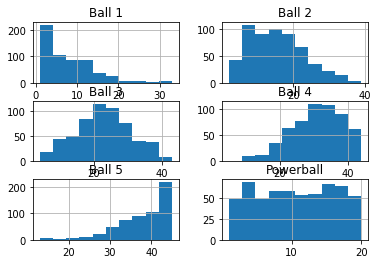

In [12]:
fig=px.scatter(lotto_data,x='Draw No',y='Powerball', hover_data=['Powerball Draw Machine'],color='Powerball Draw Machine')
fig2=lotto_data[[ 'Ball 1', 'Ball 2', 'Ball 3', 'Ball 4',
       'Ball 5','Powerball']].hist()
fig.show()
fig2
#help(px.scatter)


Set:	('P1',)
Machine:	('Suikerbossie',)
Common combination:	('Suikerbossie', 'P1')
---------------------------------------------------------------------------------
          Ball 1     Ball 2     Ball 3     Ball 4     Ball 5  Powerball  \
count  34.000000  34.000000  34.000000  34.000000  34.000000  34.000000   
mean    6.147059  14.500000  23.176471  31.911765  38.823529  11.382353   
std     5.816030   8.191829   9.449934   8.880921   7.204673   5.331523   
min     1.000000   3.000000   4.000000   9.000000  15.000000   3.000000   
25%     2.000000   7.250000  18.250000  25.750000  38.000000   7.250000   
50%     4.000000  14.500000  24.000000  34.000000  41.000000  10.500000   
75%     9.500000  20.250000  29.750000  39.000000  43.750000  15.750000   
max    25.000000  30.000000  39.000000  42.000000  45.000000  20.000000   

             Sums  
count   34.000000  
mean   125.941176  
std     29.999941  
min     52.000000  
25%    103.750000  
50%    135.000000  
75%    146.500000  

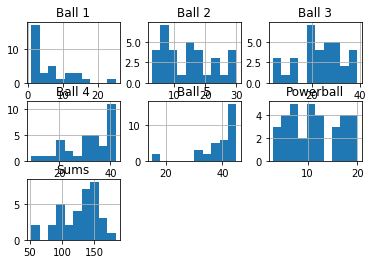

In [56]:
m_a_s=lotto_data[['Powerball Draw Machine','Ball Set']].value_counts()
s_o=lotto_data[['Ball Set']].value_counts()
m_o=lotto_data[['Powerball Draw Machine']].value_counts()
print(f"Set:\t{s_o.idxmax()}\nMachine:\t{m_o.idxmax()}\nCommon combination:\t{m_a_s.idxmax()}")
m_o.idxmax()[0]
common_hist=lotto_data[(lotto_data["Ball Set"]==s_o.idxmax()[0]) & (lotto_data["Powerball Draw Machine"]==m_o.idxmax()[0])][['Ball 1', 'Ball 2', 'Ball 3',\
                                                                   'Ball 4','Ball 5','Powerball',"Sums"]].hist()
common_discrption=lotto_data[(lotto_data["Ball Set"]==s_o.idxmax()[0]) & (lotto_data["Powerball Draw Machine"]==m_o.idxmax()[0])][['Ball 1', 'Ball 2', 'Ball 3',\
                                                                   'Ball 4','Ball 5','Powerball',"Sums"]].describe()
print(f"{'---'*27}\n{common_discrption}")

In [29]:
lotto_data["Sums"]=lotto_data[['Ball 1', 'Ball 2', 'Ball 3', 'Ball 4',
       'Ball 5', 'Powerball']].sum(axis=1)


In [30]:
lotto_data["Sums"].head()

0     92
1    131
2    163
3    112
4    170
Name: Sums, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



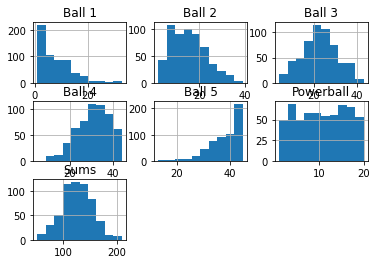

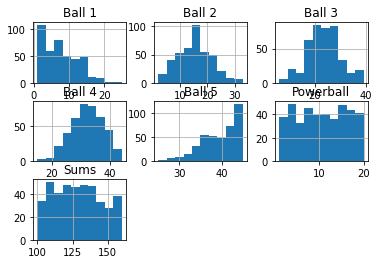

In [31]:
fig3=lotto_data[['Ball 1', 'Ball 2', 'Ball 3', 'Ball 4',
       'Ball 5', 'Powerball',"Sums"]].hist()
fig4=lotto_data[lotto_data["Sums"].between(100,160, inclusive=True)][['Ball 1', 'Ball 2', 'Ball 3', 'Ball 4','Ball 5', 'Powerball',"Sums"]].hist()
